In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to replace semicolon with comma
def semicolon_to_comma(name):

    reading_file = open(name + ".csv", "r")
    new_file_content = ""
    for line in reading_file:
        stripped_line = line.strip()
        new_line = stripped_line.replace(";", ",")
        new_file_content += new_line +"\n"
    reading_file.close()
    writing_file = open(name + ".csv", "w")
    writing_file.write(new_file_content)
    writing_file.close()

In [3]:
file_name = 'Turin'
semicolon_to_comma(file_name)

In [4]:
# Creat a dataframe for the beacons_dataset
df = pd.read_csv(file_name + '.csv')
df

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00+02:00,19.859999,20.469999,18.5,19.020000,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00+02:00,19.855000,20.430000,18.5,19.020000,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00+02:00,19.850000,20.410000,18.5,19.020000,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00+02:00,19.840000,20.379999,18.5,19.080000,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00+02:00,19.830000,20.350000,18.5,19.080000,20.299999,71.580002,59.559998,79.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
33883,2021-04-14 22:45:00+02:00,19.539999,20.004999,20.5,19.619999,14.700000,39.020000,27.930000,57.0,0.0,0.0
33884,2021-04-14 23:00:00+02:00,19.520000,19.949999,20.5,19.539999,13.700000,39.020000,28.090000,57.0,0.0,0.0
33885,2021-04-14 23:15:00+02:00,19.430000,19.955000,20.5,19.420000,13.700000,39.399998,27.930000,57.0,0.0,0.0
33886,2021-04-14 23:30:00+02:00,19.420000,19.920000,20.5,19.400000,13.700000,39.599998,28.039999,57.0,0.0,0.0


In [5]:
# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


In [6]:
# Check some statistics about the columns
df.describe()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000
mean,20.436936,19.994425,22.302290,18.580051,12.414164,45.433972,37.251636,73.803308,5.769196,2.308225
std,3.535683,2.357756,0.745301,2.237516,4.925918,10.765867,11.253552,21.116373,6.074394,2.432835
min,12.264999,12.344999,18.500000,12.300000,2.300000,19.939999,11.730000,11.000000,0.000000,0.000000
25%,17.879999,18.389999,22.500000,17.260000,8.900000,37.709999,29.420000,60.000000,0.000000,0.000000
50%,19.785000,20.385000,22.500000,18.059999,11.800000,44.669998,36.230000,78.500000,0.000000,0.000000
75%,23.256249,21.699999,22.500000,20.180000,15.300000,51.180000,43.329998,93.000000,12.000000,4.980000
max,30.295000,25.990000,23.500000,26.400000,32.799999,84.699997,78.699997,100.000000,15.000000,5.316000


In [7]:
# Count the null values of each column
df.isna().sum()

Timestamp       0
T_Supply        0
T_Return        0
SP_Return       0
T_Saturation    0
T_Outdoor       0
RH_Supply       0
RH_Return       0
RH_Outdoor      0
Energy          0
Power           0
dtype: int64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True, format='%Y-%m-%d %H:%M').dt.tz_convert(None)
#df = df.drop(columns=['Energy', 'Power'])
df.set_index('Timestamp', inplace=True)
df.to_csv("TurinAHU.csv", index=False)

In [9]:
# slice the DataFrame to select a range of dates
start_date = '2019-11-01 00:00:00'
end_date = '2019-11-30 23:45:00'
df_nov = df.loc[start_date:end_date]

# slice the DataFrame to select a range of dates
start_date = '2019-12-01 00:00:00'
end_date = '2019-12-31 23:45:00'
df_dec = df.loc[start_date:end_date]

# slice the DataFrame to select a range of dates
start_date = '2020-03-01 00:00:00'
end_date = '2020-03-31 23:45:00'
df_apr = df.loc[start_date:end_date]

# slice the DataFrame to select a range of dates
start_date = '2020-04-01 00:00:00'
end_date = '2020-04-30 23:45:00'
df_may = df.loc[start_date:end_date]
df_may

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
Timestamp,,,,,,,,,,
2020-04-01 00:00:00,18.565001,18.514999,22.5,18.820000,10.600000,43.160000,35.070000,78.5,0.0,0.0
2020-04-01 00:15:00,18.565001,18.490000,22.5,18.760000,11.600000,43.160000,35.200001,76.0,0.0,0.0
2020-04-01 00:30:00,18.539999,18.440001,22.5,18.719999,10.600000,43.270000,35.389999,78.5,0.0,0.0
2020-04-01 00:45:00,18.494999,18.440001,22.5,18.660000,9.600000,43.290001,35.360001,81.0,0.0,0.0
2020-04-01 01:00:00,18.475000,18.414999,22.5,18.639999,9.600000,43.360001,35.450001,78.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-04-14 20:45:00,23.394999,23.779999,23.5,24.859999,21.799999,38.489998,26.849998,67.0,0.0,0.0
2020-04-14 21:00:00,23.340000,23.725000,23.5,24.719999,21.799999,38.559998,27.090000,67.0,0.0,0.0
2020-04-14 21:15:00,23.260000,23.600000,23.5,24.639999,20.799999,38.689999,27.799999,67.0,0.0,0.0


In [10]:
df.to_csv('TurinAHU.csv')

Text(0, 0.5, 'Value')

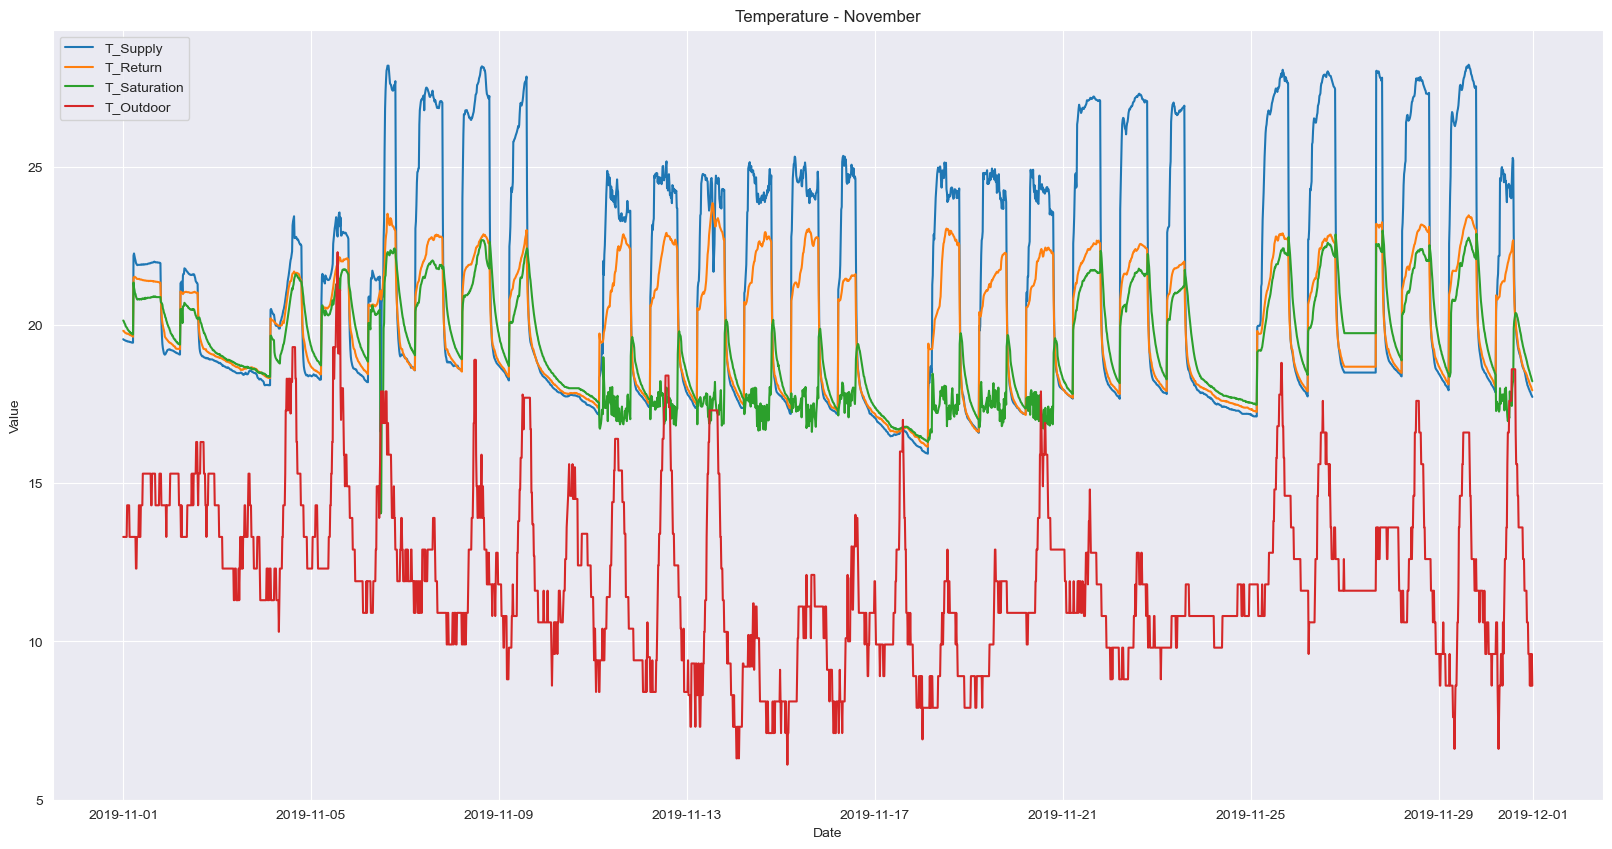

In [11]:
cols_to_plot = ['T_Supply', 'T_Return', 'T_Saturation', 'T_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(20, 10))
for col in cols_to_plot:
    ax.plot(df_nov.index, df_nov[col], label=col)
ax.legend()
ax.set_title('Temperature - November')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

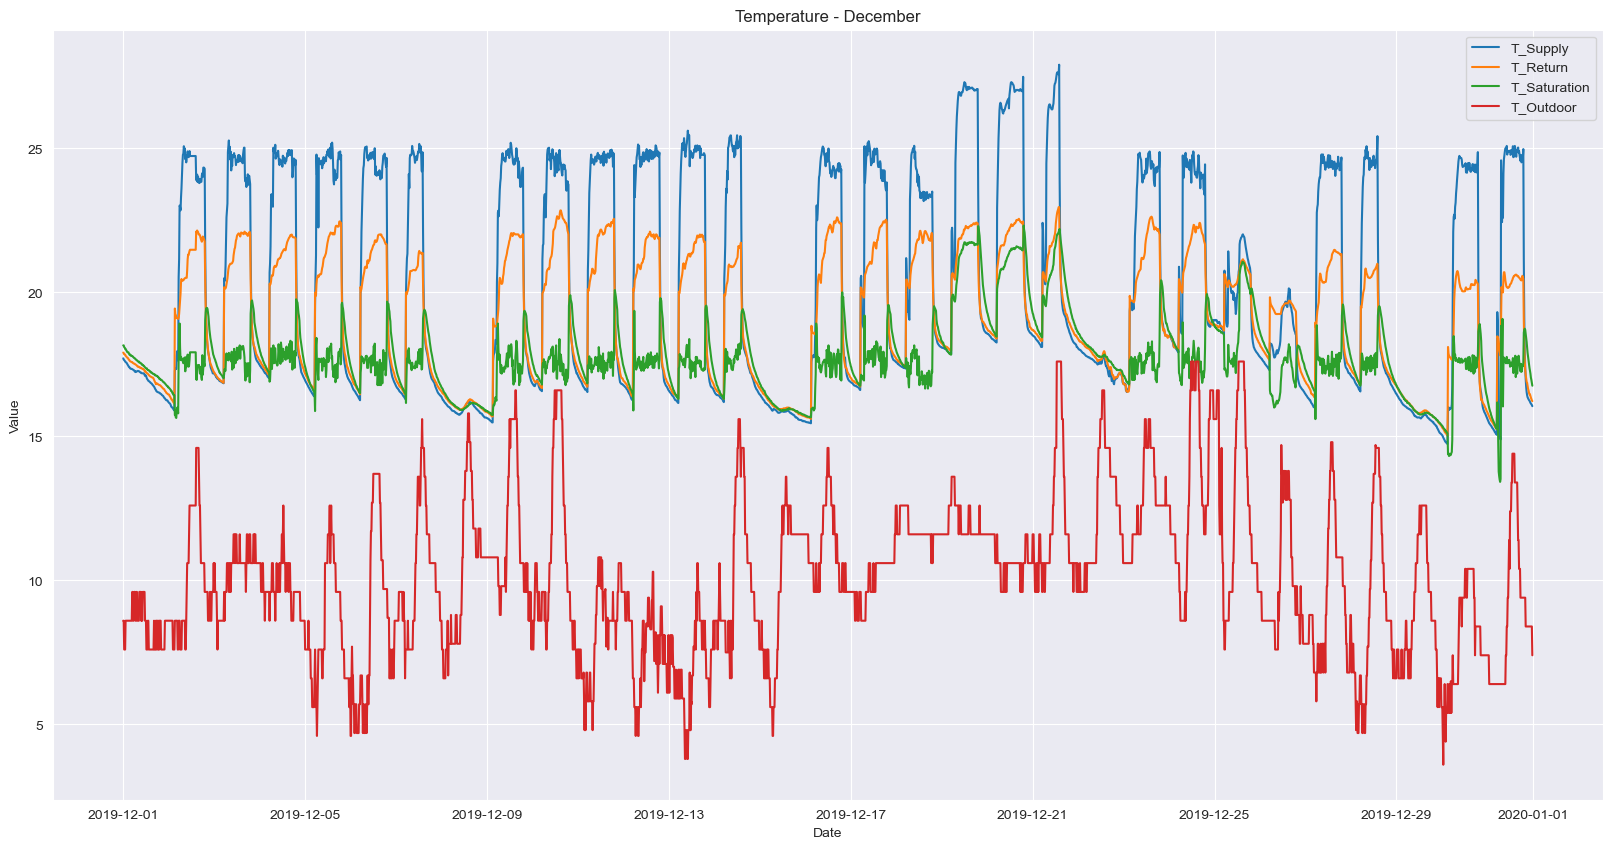

In [12]:
cols_to_plot = ['T_Supply', 'T_Return', 'T_Saturation', 'T_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(20, 10))
for col in cols_to_plot:
    ax.plot(df_dec.index, df_dec[col], label=col)
ax.legend()
ax.set_title('Temperature - December')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

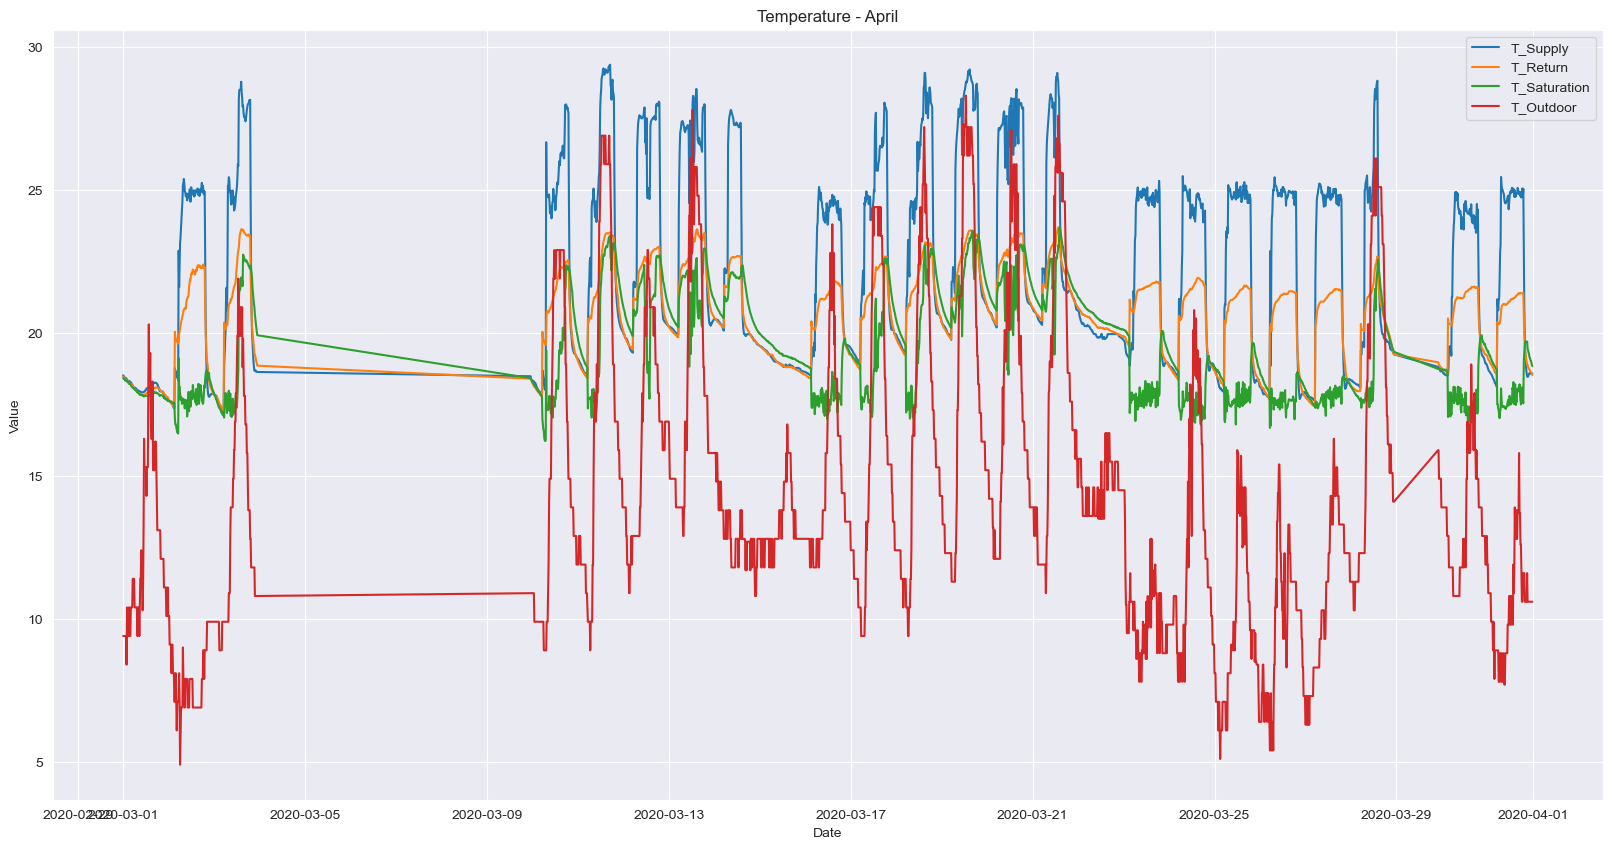

In [13]:
cols_to_plot = ['T_Supply', 'T_Return', 'T_Saturation', 'T_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(20, 10))
for col in cols_to_plot:
    ax.plot(df_apr.index, df_apr[col], label=col)
ax.legend()
ax.set_title('Temperature - April')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

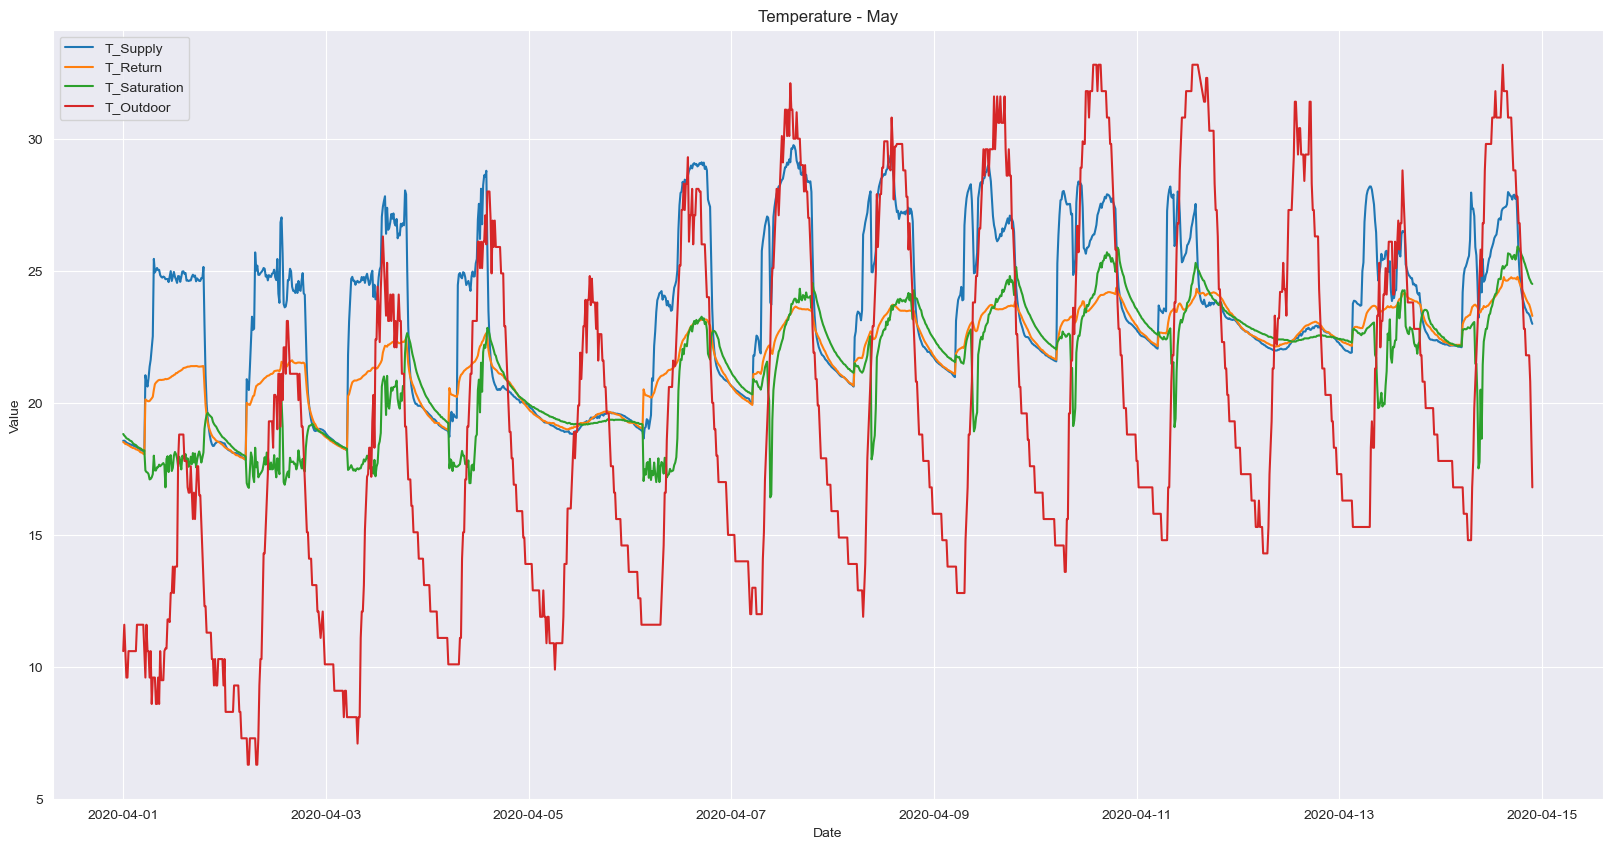

In [14]:
cols_to_plot = ['T_Supply', 'T_Return', 'T_Saturation', 'T_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(20, 10))
for col in cols_to_plot:
    ax.plot(df_may.index, df_may[col], label=col)
ax.legend()
ax.set_title('Temperature - May')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

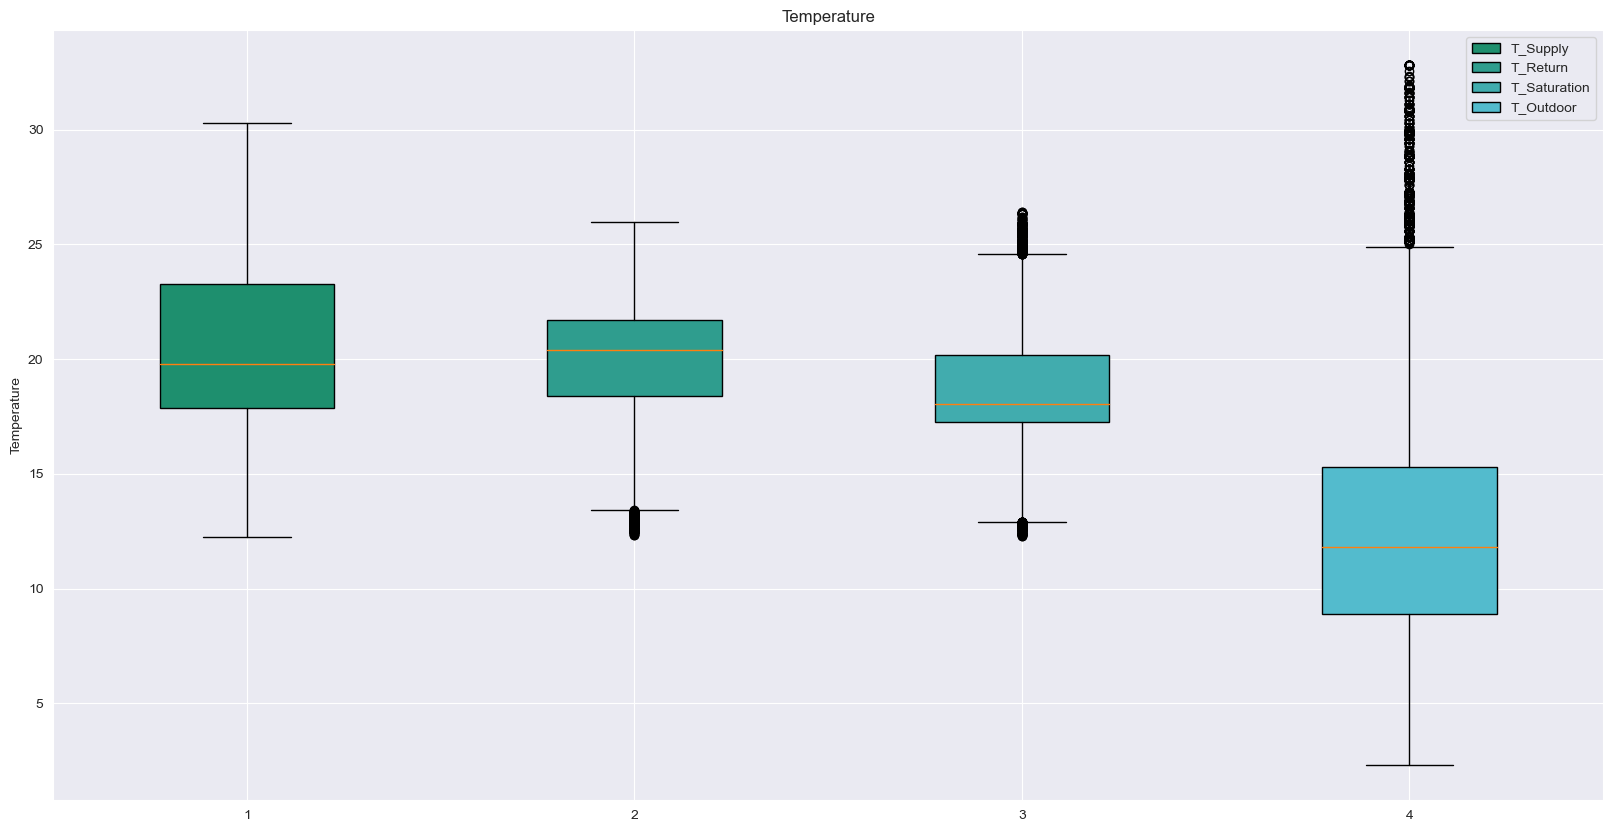

In [15]:
# Boxplot of temperature of each room
cols_to_plot = ['T_Supply', 'T_Return', 'T_Saturation', 'T_Outdoor']

fig, ax = plt.subplots(figsize=(20,10))

data_to_plot = []
labels = []

colors = ['#1E8F6E', '#2F9D8E', '#41ACAE', '#53BBCD']

for col in cols_to_plot:
    data_to_plot.append(df[col])
    labels.append(col)

box = ax.boxplot(data_to_plot, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Temperature')
ax.set_ylabel('Temperature')

plt.legend(handles=box['boxes'], labels=labels)

plt.show()

Text(0, 0.5, 'Value')

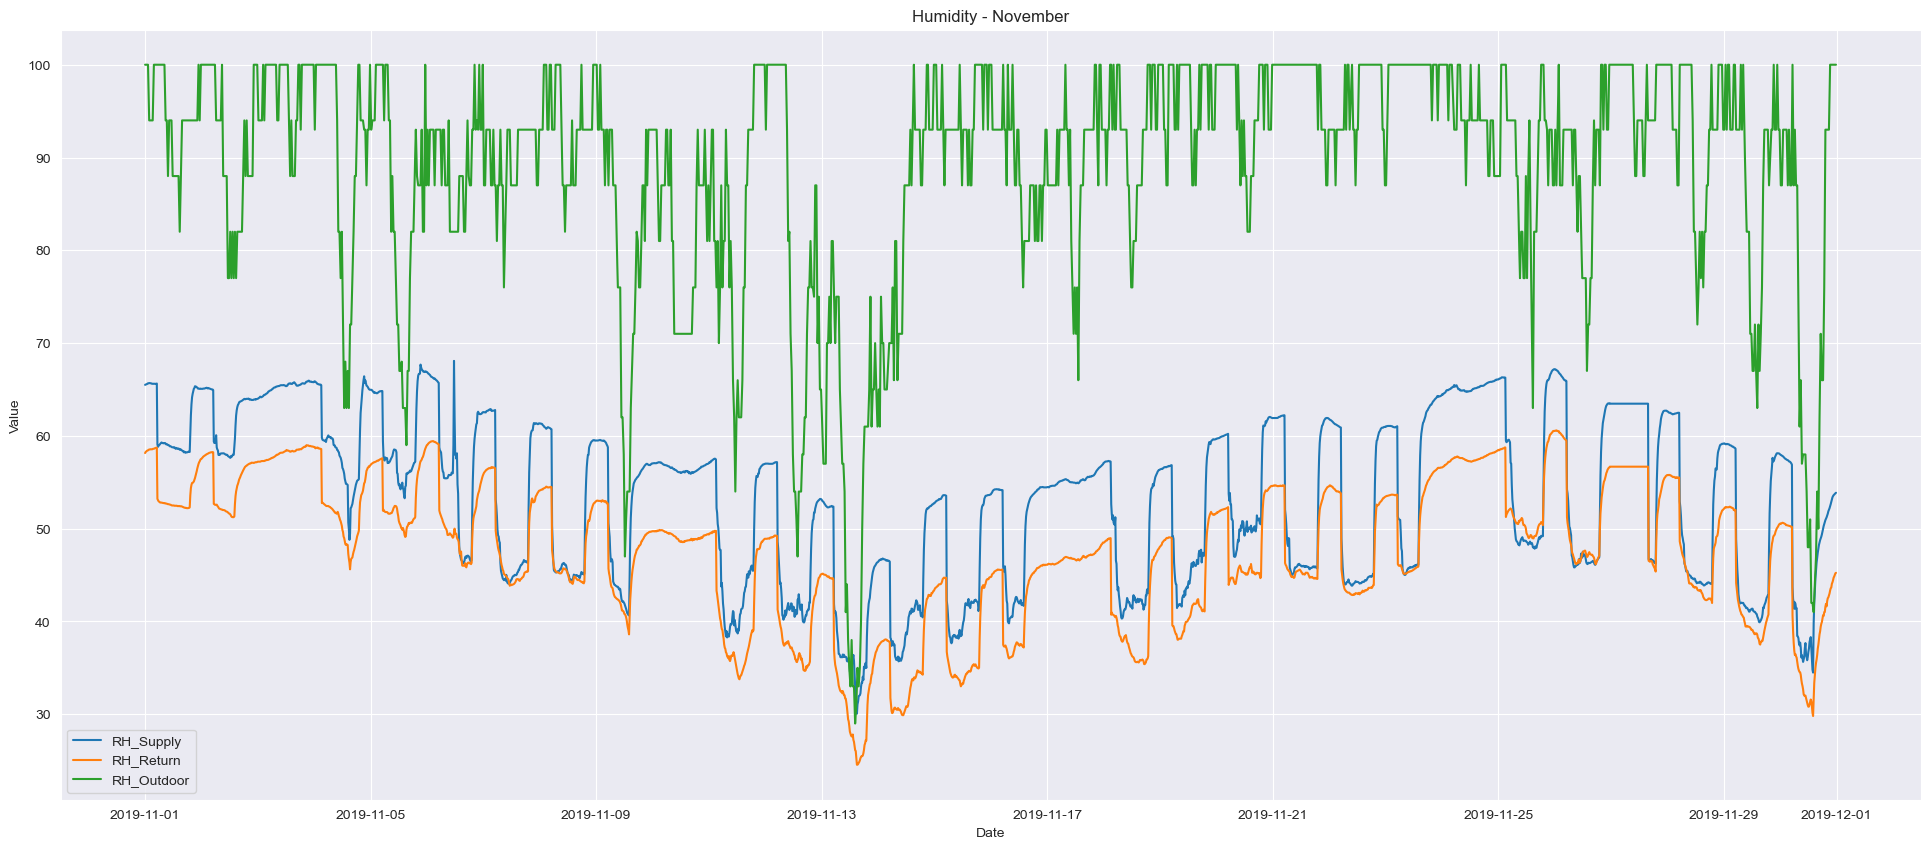

In [16]:
cols_to_plot = ['RH_Supply', 'RH_Return', 'RH_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(24, 10))
for col in cols_to_plot:
    ax.plot(df_nov.index, df_nov[col], label=col)
ax.legend()
ax.set_title('Humidity - November')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

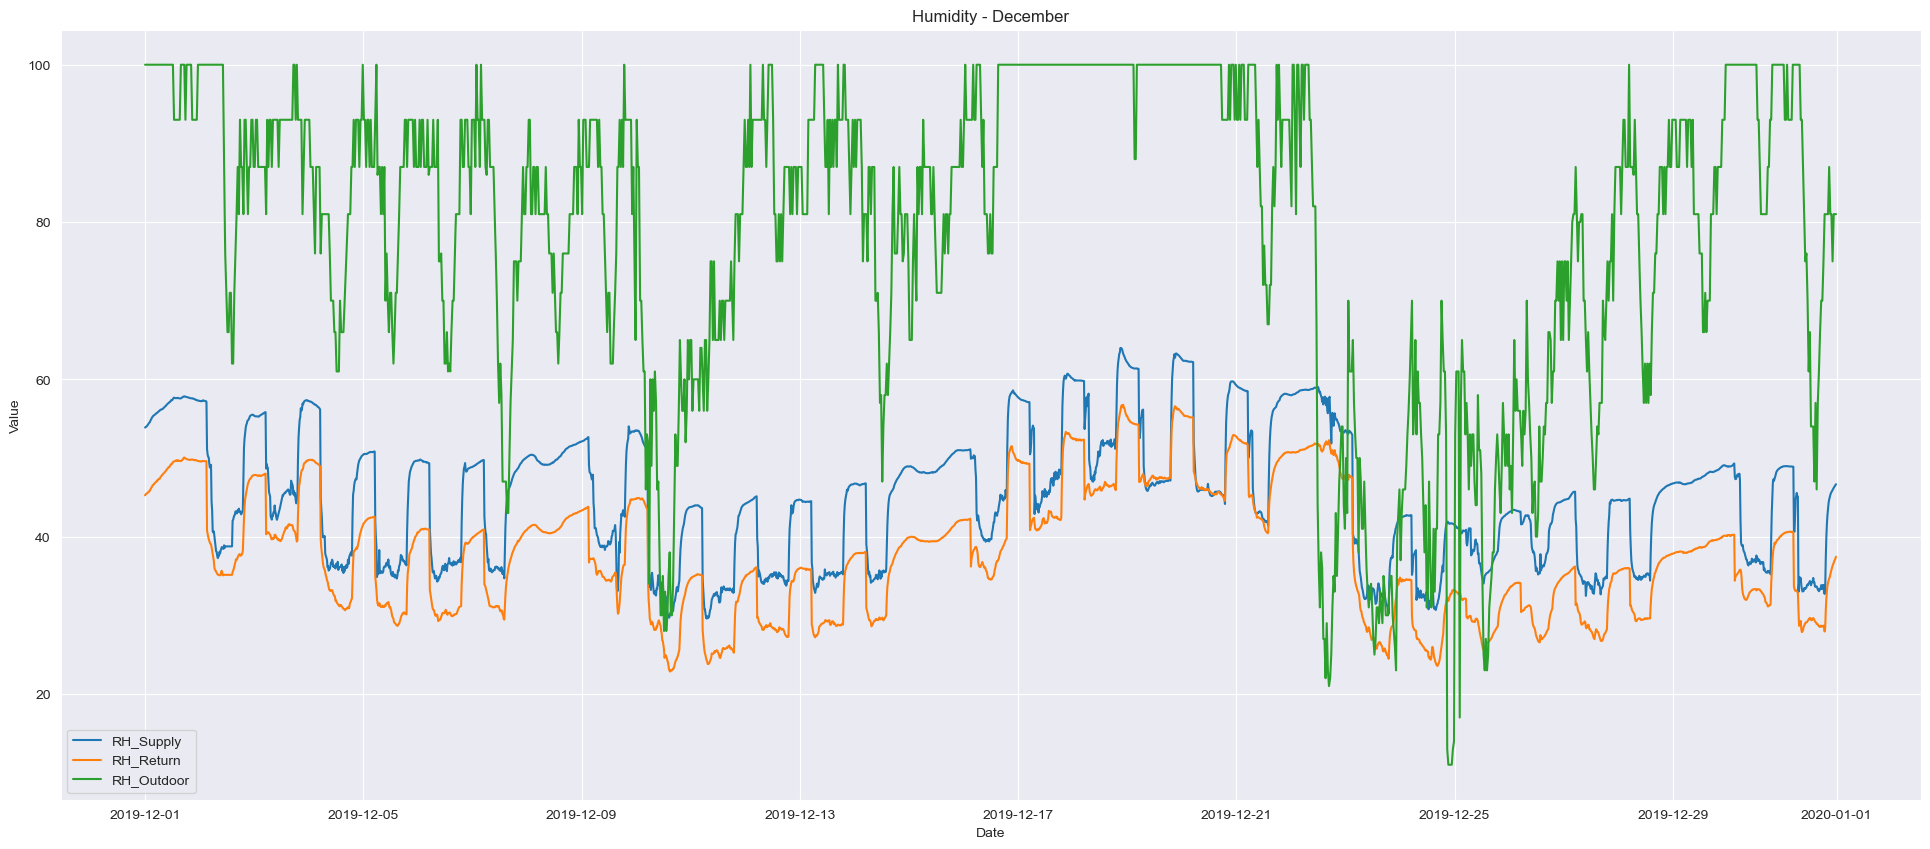

In [17]:
cols_to_plot = ['RH_Supply', 'RH_Return', 'RH_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(24, 10))
for col in cols_to_plot:
    ax.plot(df_dec.index, df_dec[col], label=col)
ax.legend()
ax.set_title('Humidity - December')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

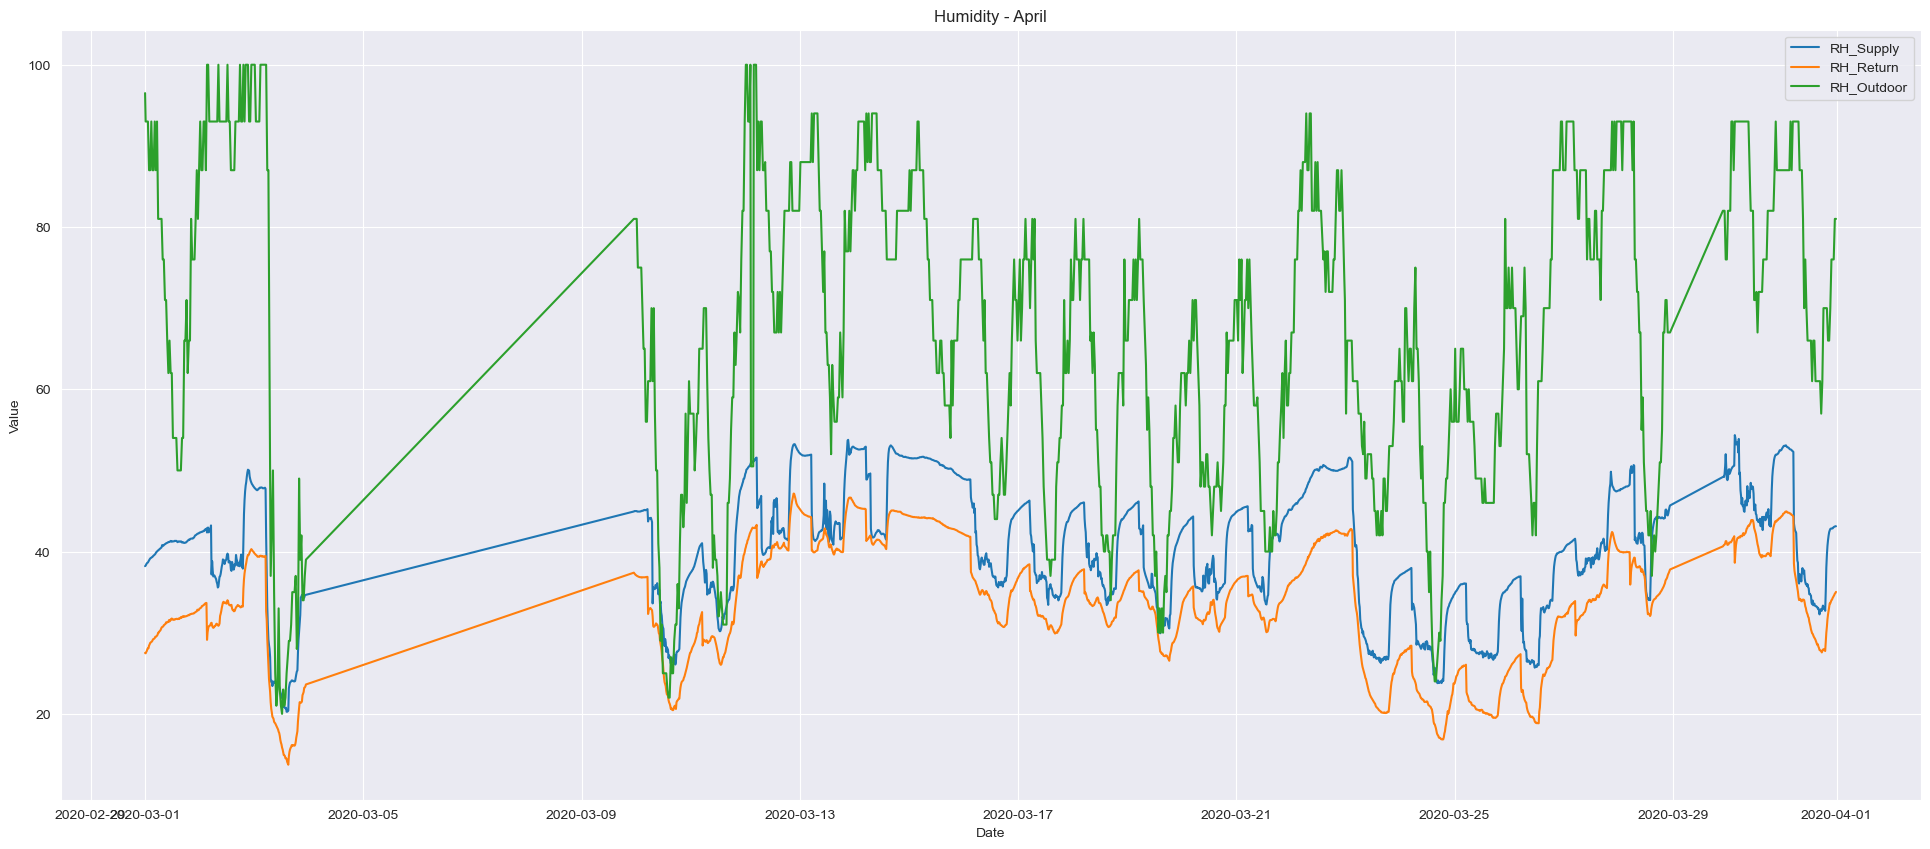

In [18]:
cols_to_plot = ['RH_Supply', 'RH_Return', 'RH_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(24, 10))
for col in cols_to_plot:
    ax.plot(df_apr.index, df_apr[col], label=col)
ax.legend()
ax.set_title('Humidity - April')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

Text(0, 0.5, 'Value')

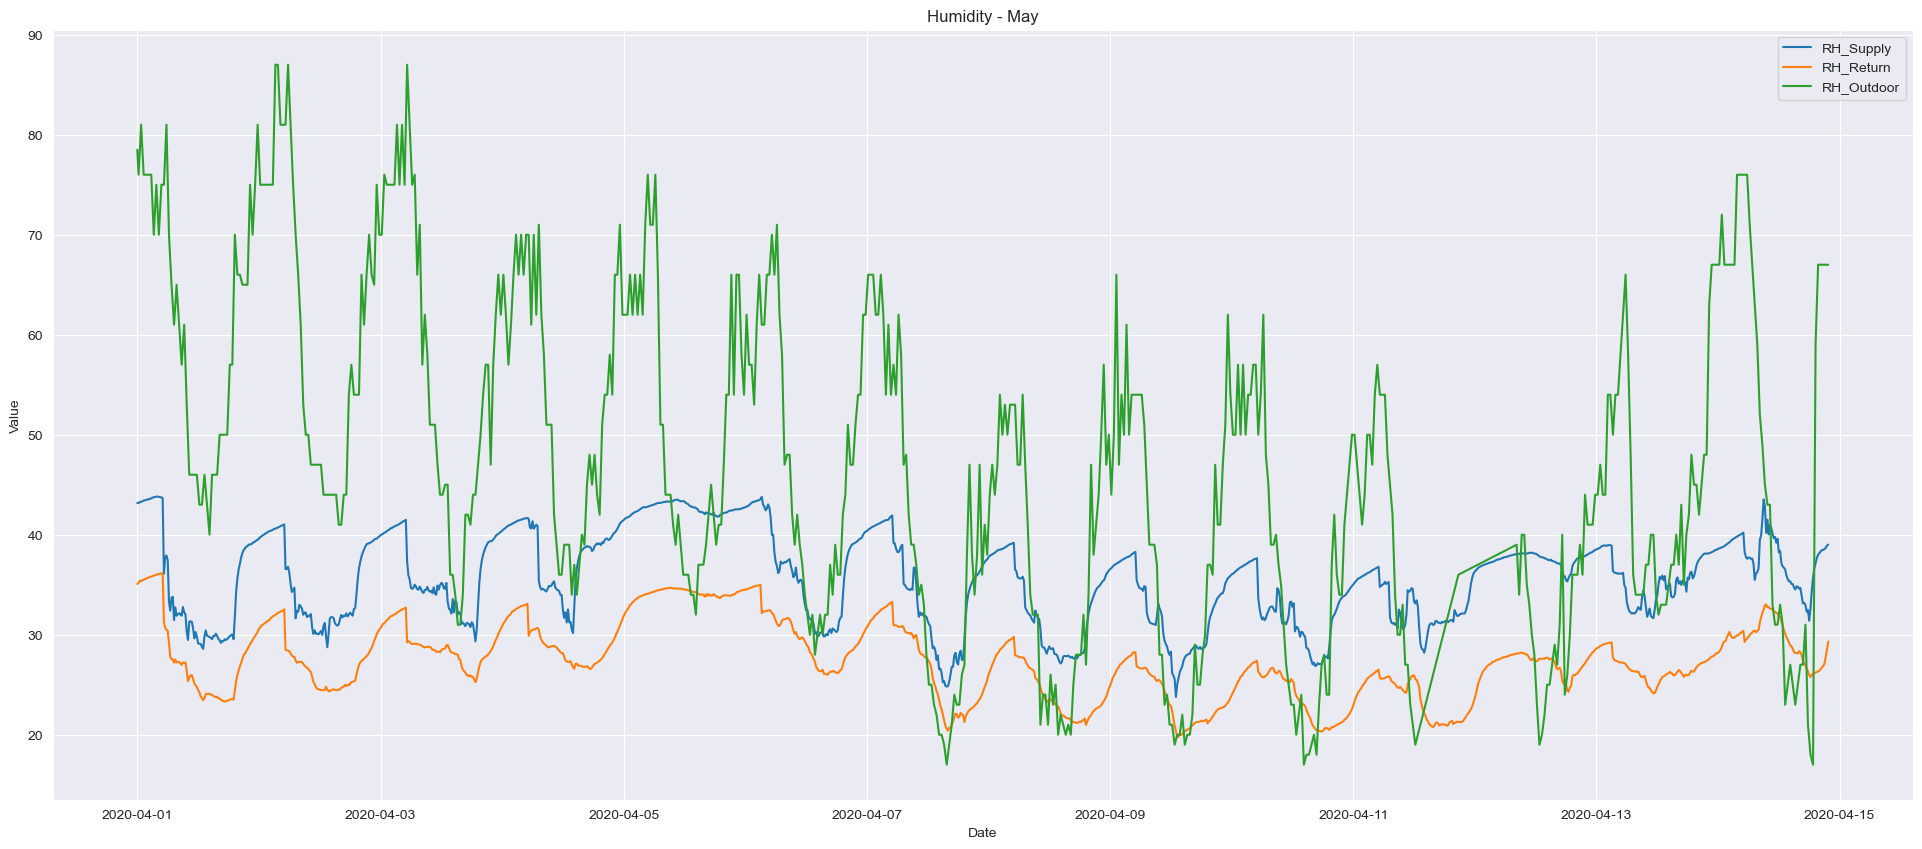

In [19]:
cols_to_plot = ['RH_Supply', 'RH_Return', 'RH_Outdoor']

# plot the selected columns
fig, ax = plt.subplots(figsize=(24, 10))
for col in cols_to_plot:
    ax.plot(df_may.index, df_may[col], label=col)
ax.legend()
ax.set_title('Humidity - May')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

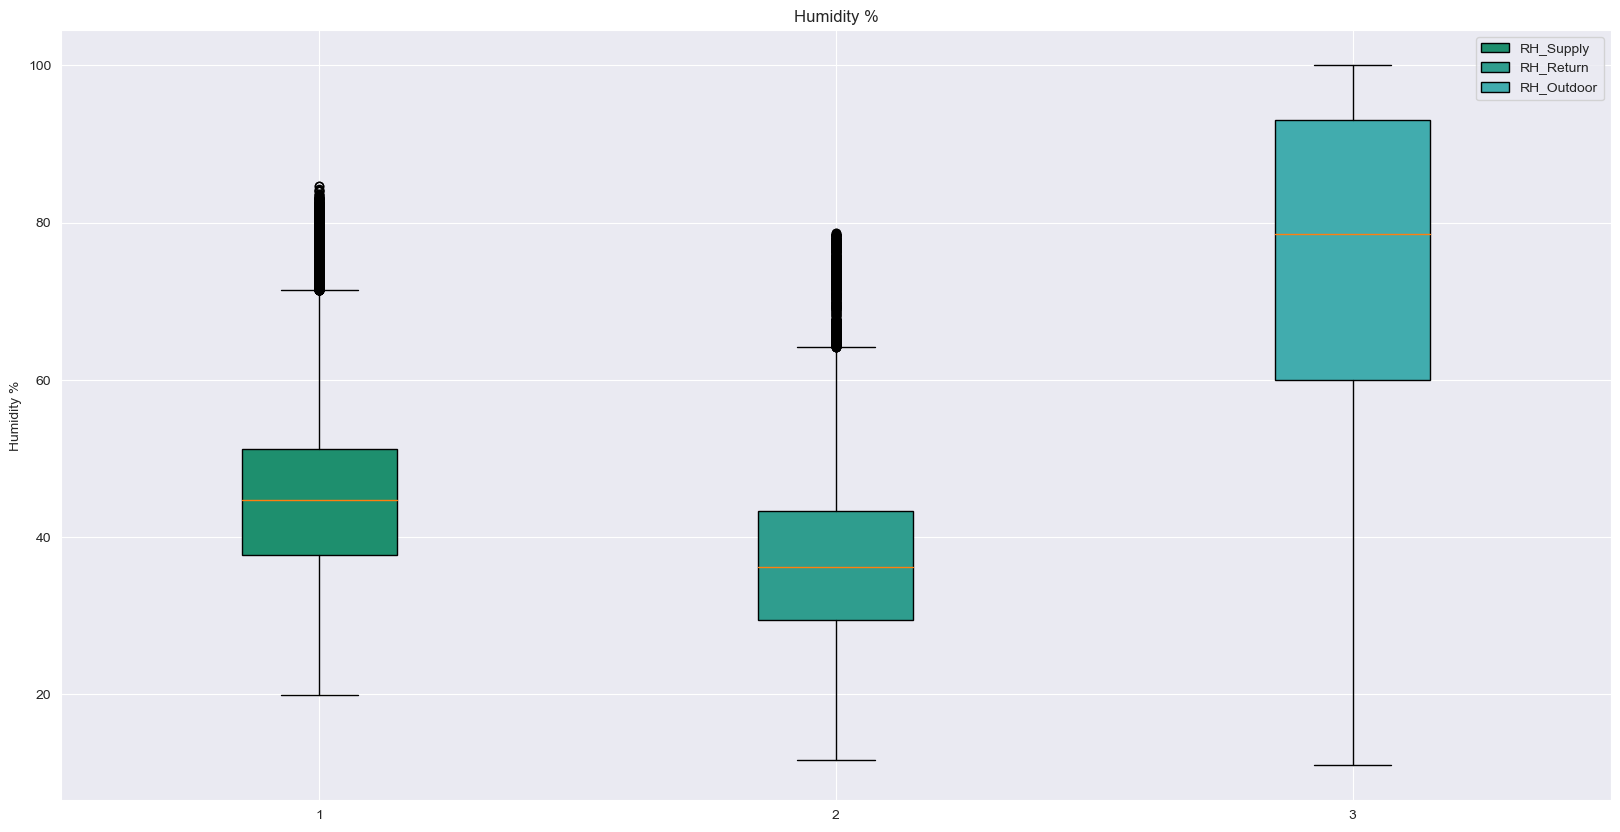

In [20]:
# Boxplot of humidity
cols_to_plot = ['RH_Supply', 'RH_Return', 'RH_Outdoor']

fig, ax = plt.subplots(figsize=(20,10))

data_to_plot = []
labels = []

colors = ['#1E8F6E', '#2F9D8E', '#41ACAE', '#53BBCD']

for col in cols_to_plot:
    data_to_plot.append(df[col])
    labels.append(col)

box = ax.boxplot(data_to_plot, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Humidity %')
ax.set_ylabel('Humidity %')

plt.legend(handles=box['boxes'], labels=labels)

plt.show()

<Axes: >

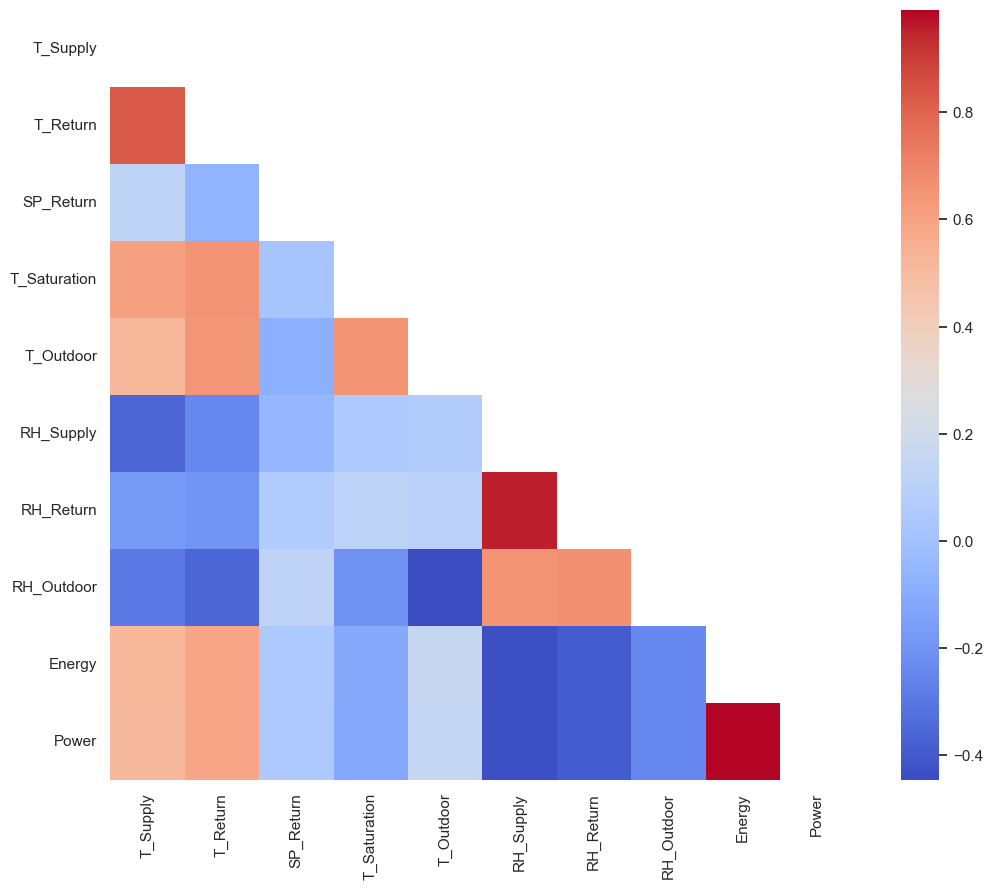

In [21]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm')